# Not Fully Connected

## Imports


In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, concatenate
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import random
import numpy as np

from tensorflow.keras.callbacks import EarlyStopping



## Data

In [2]:
def gen_data_add(num_examples, range_start, range_end):
    X = []
    y = []
    for ex in range(num_examples):
        num1 = int(random.random()*(range_end - range_start) + range_start)
        num2 = int(random.random()*(range_end - range_start) + range_start)

        X.append([num1,num2,43])        
        y.append(num1+num2)
    return np.array(X), np.array(y)

def gen_data_sub(num_examples, range_start, range_end):
    X = []
    y = []
    for ex in range(num_examples):
        num1 = int(random.random()*(range_end - range_start) + range_start)
        num2 = int(random.random()*(range_end - range_start) + range_start)

        X.append([num1,num2,145])        
        y.append(num1-num2)
    return np.array(X), np.array(y)

def gen_data_mult(num_examples, range_start, range_end):
    X = []
    y = []
    for ex in range(num_examples):
        num1 = int(random.random()*(range_end - range_start) + range_start)
        num2 = int(random.random()*(range_end - range_start) + range_start)

        X.append([num1,num2,242])        
        y.append(num1*num2)
    return np.array(X), np.array(y)

def gen_data_div(num_examples, range_start, range_end):
    X = []
    y = []
    for ex in range(num_examples):
        num1 = int(random.random()*(range_end - range_start) + range_start)
        num2 = int(random.random()*(range_end - range_start) + range_start)

        X.append([num1,num2,347])        
        y.append(num1/num2)
    return np.array(X), np.array(y)

def gen_data(num_examples, range_start, range_end):
    num_examples = int(num_examples/4)
    
    ax, ay = gen_data_add(num_examples, range_start, range_end)
    mx, my = gen_data_sub(num_examples, range_start, range_end)
    mux, muy = gen_data_mult(num_examples, range_start, range_end)
    dx, dy = gen_data_div(num_examples, range_start, range_end)
    
    X = np.concatenate((ax, mx, mux, dx))
    y = np.concatenate((ay, my, muy, dy))
    
    return X, y

In [3]:
x_train, y_train = gen_data_add(10, -50, 50)
x_test, y_test = gen_data_add(10, 50, 200)

x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
[a.shape for a in [x_train, y_train, x_test, y_test]]

[(10, 1, 3), (10,), (10, 1, 3), (10,)]

## Sample Model
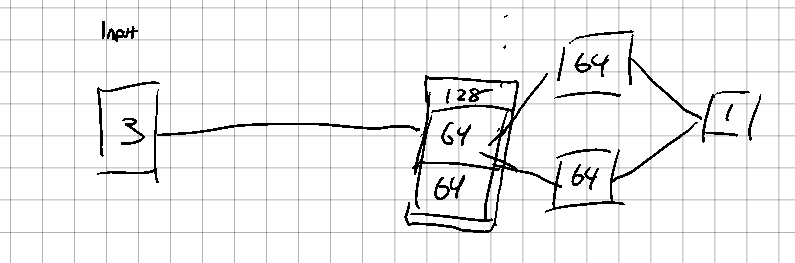

## Building The Model


### Input Layer

In [4]:
# Input layer of 3 neurons 
inp = Input(shape=(1,3))

### Hidden Layers

In [5]:
#128 layer
d2_out = Dense(128)(inp)

#grab first, 2nd half of the 128 layer
d2_out_p1 = Lambda(lambda x: x[:,:,0:64])(d2_out)
d2_out_p2 = Lambda(lambda x: x[:,:,64:128])(d2_out)

#64 layer(s)
d3_out = Dense(64)(d2_out_p1)
d4_out = Dense(64)(d2_out_p2)

#grab output nodes from both 64 layers
d5_out = concatenate([d3_out, d4_out])

### Output Layer

In [6]:
o = Dense(1)(d5_out)

### Keras Model

In [7]:
model = Model(inp, o)

model.compile(
    loss="MeanSquaredError",
    metrics=['accuracy']
)


## Train Model

In [8]:
es = EarlyStopping(monitor='val_loss', mode='min')

history = model.fit(
    x_train, y_train,
    batch_size=10000,
    epochs=100,
    validation_data=(x_test,y_test)
#     callbacks = [es]
)

Epoch 1/100
1/1 [==============================] - 1s 572ms/step - loss: 2323.4194 - accuracy: 0.0000e+00 - val_loss: 36488.9609 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 74ms/step - loss: 1373.3757 - accuracy: 0.0000e+00 - val_loss: 23627.9336 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 66ms/step - loss: 901.7826 - accuracy: 0.0000e+00 - val_loss: 15875.6934 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 75ms/step - loss: 599.9510 - accuracy: 0.0000e+00 - val_loss: 10448.7725 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 83ms/step - loss: 394.7541 - accuracy: 0.0000e+00 - val_loss: 6728.7031 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 117ms/step - loss: 253.6013 - accuracy: 0.0000e+00 - val_loss: 4188.3027 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 85ms/step - loss: 15

## Test Model

In [9]:
acc_range = 0.5

In [10]:
pred = model.predict(x_test)

In [11]:
test_total = 0
acc_count = 0
for a in range(len(x_test)):
    x = x_test[a]
    y = y_test[a]
    yp = pred[a][0]
    print(f"input={x[0]} expected_output={[y]} prediction={yp} difference={yp - y} %-different from actual={abs(yp - y)/y}")
    
    if abs(yp - y) <= acc_range:
        acc_count = acc_count + 1
    
    test_total = test_total + 1
        
    print(f"\t accuracy={acc_count / test_total}")

input=[ 73 158  43] expected_output=[231] prediction=[230.47408] difference=[-0.5259247] %-different from actual=[0.00227673]
	 accuracy=0.0
input=[86 79 43] expected_output=[165] prediction=[164.32567] difference=[-0.67433167] %-different from actual=[0.00408686]
	 accuracy=0.0
input=[ 70 151  43] expected_output=[221] prediction=[220.58739] difference=[-0.41261292] %-different from actual=[0.00186703]
	 accuracy=0.3333333333333333
input=[126  82  43] expected_output=[208] prediction=[206.09804] difference=[-1.9019623] %-different from actual=[0.00914405]
	 accuracy=0.25
input=[119  95  43] expected_output=[214] prediction=[212.2705] difference=[-1.7295074] %-different from actual=[0.00808181]
	 accuracy=0.2
input=[162  85  43] expected_output=[247] prediction=[243.99222] difference=[-3.007782] %-different from actual=[0.01217726]
	 accuracy=0.16666666666666666
input=[122  69  43] expected_output=[191] prediction=[189.2606] difference=[-1.7393951] %-different from actual=[0.00910678]
